In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import string
from datetime import datetime, timedelta

In [3]:
# Generate a fixed set of unique machine
def generate_unique_machine_ids(n=60):
    machine_ids = set()
    while len(machine_ids) < n:
        prefix = random.choice(string.ascii_uppercase)
        suffix = ''.join(random.choices(string.ascii_uppercase + string.digits, k=3))
        machine_ids.add(f"{prefix}-{suffix}")
    return list(machine_ids)

In [4]:
# Data generation logic
def generate_data(n=5000):
    unique_machine_ids = generate_unique_machine_ids(60)
    data = []

    base_time = datetime.now() - timedelta(days=365 * 10)
    total_seconds = 10 * 365 * 24 * 60 * 60  # 10 years

    for _ in range(n):
        random_seconds = random.randint(0, total_seconds)
        timestamp = base_time + timedelta(seconds=random_seconds)

        temp = round(random.uniform(60, 100), 2)
        vib = round(random.uniform(0.5, 3.0), 2)
        rpm = random.randint(2500, 3100)
        pres = round(random.uniform(3, 8), 2)
        hum = round(random.uniform(30, 70), 2)
        volt = round(random.uniform(210, 250), 2)

        machine_id = random.choice(unique_machine_ids)

        failure = 1 if (
            (temp > 90 and vib > 2.5) or
            (rpm > 3000 and pres > 7) or
            (volt < 215 and hum > 65) or
            (temp > 95 and rpm > 3050 and vib > 2.8)
        ) else 0

        data.append({
            "timestamp": timestamp.isoformat(),
            "machine_id": machine_id,
            "temperature": temp,
            "vibration": vib,
            "rpm": rpm,
            "pressure": pres,
            "humidity": hum,
            "voltage": volt,
            "failure": failure
        })

    return data

In [5]:
# Save data to JSON file

json_data = "/content/drive/MyDrive/SmartFactory/Dataset/factory_sensor_data.json"
def save_to_json(filename=json_data):
    data = generate_data()
    with open(filename, "w") as f:
        json.dump(data, f, indent=2)
    print(f"Saved {len(data)} records to {filename}")

# Run the script
if __name__ == "__main__":
    save_to_json()

Saved 5000 records to /content/drive/MyDrive/SmartFactory/Dataset/factory_sensor_data.json


In [6]:
# Load JSON data
with open(json_data) as f:
    data = json.load(f)

In [7]:
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values('timestamp', inplace=True)

In [8]:
df.reset_index(inplace=True)
df.head(10)

,index,timestamp,machine_id,temperature,vibration,rpm,pressure,humidity,voltage,failure
0,3168,2015-05-26 20:55:13.644050,B-MY9,71.47,0.94,2694,7.50,65.72,215.55,0
1,2680,2015-05-27 20:15:37.644050,N-PR7,64.60,2.44,3054,6.96,44.25,226.71,0
2,3897,2015-05-28 07:53:40.644050,Y-09D,76.14,1.93,2952,6.41,51.60,243.14,0
3,824,2015-05-29 09:45:29.644050,X-PYA,73.72,1.87,2607,7.13,59.94,229.21,0
4,1952,2015-05-30 06:22:48.644050,G-2H4,77.37,0.57,3063,4.08,47.57,221.11,0
5,4710,2015-05-30 16:01:03.644050,M-TZ4,98.72,1.07,2660,3.23,47.61,230.24,0
6,4592,2015-06-03 01:00:13.644050,E-HZH,70.75,1.53,2816,7.90,42.15,238.91,0
7,4252,2015-06-03 01:56:56.644050,L-U6X,68.92,1.70,2790,6.92,44.91,216.15,0
8,980,2015-06-04 03:41:51.644050,X-PYA,66.37,1.80,2823,6.96,63.87,212.05,0
9,1865,2015-06-05 08:17:11.644050,B-MY9,76.28,1.75,2661,5.68,66.33,226.15,0


In [9]:
sns.set(style="whitegrid")

In [10]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
             index                      timestamp  temperature    vibration  \
count  5000.000000                           5000  5000.000000  5000.000000   
mean   2499.500000  2020-06-01 13:34:22.542450176    79.750462     1.767712   
min       0.000000     2015-05-26 20:55:13.644050    60.010000     0.500000   
25%    1249.750000  2017-11-27 21:34:17.894049792    69.520000     1.130000   
50%    2499.500000  2020-06-21 18:26:26.144049920    79.540000     1.780000   
75%    3749.250000  2022-12-03 13:34:08.394050048    89.912500     2.390000   
max    4999.000000     2025-05-22 17:43:20.644050   100.000000     3.000000   
std    1443.520003                            NaN    11.657305     0.718834   

               rpm     pressure     humidity     voltage      failure  
count  5000.000000  5000.000000  5000.000000  5000.00000  5000.000000  
mean   2798.278600     5.497176    50.006420   229.72345     0.099400  
min    2500.000000     3.000000    30.000000   210.0

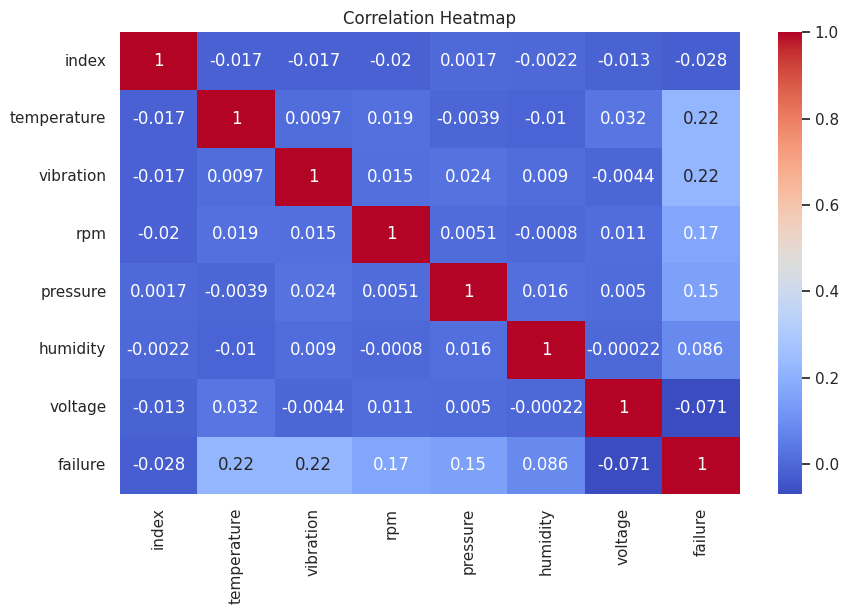

In [11]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

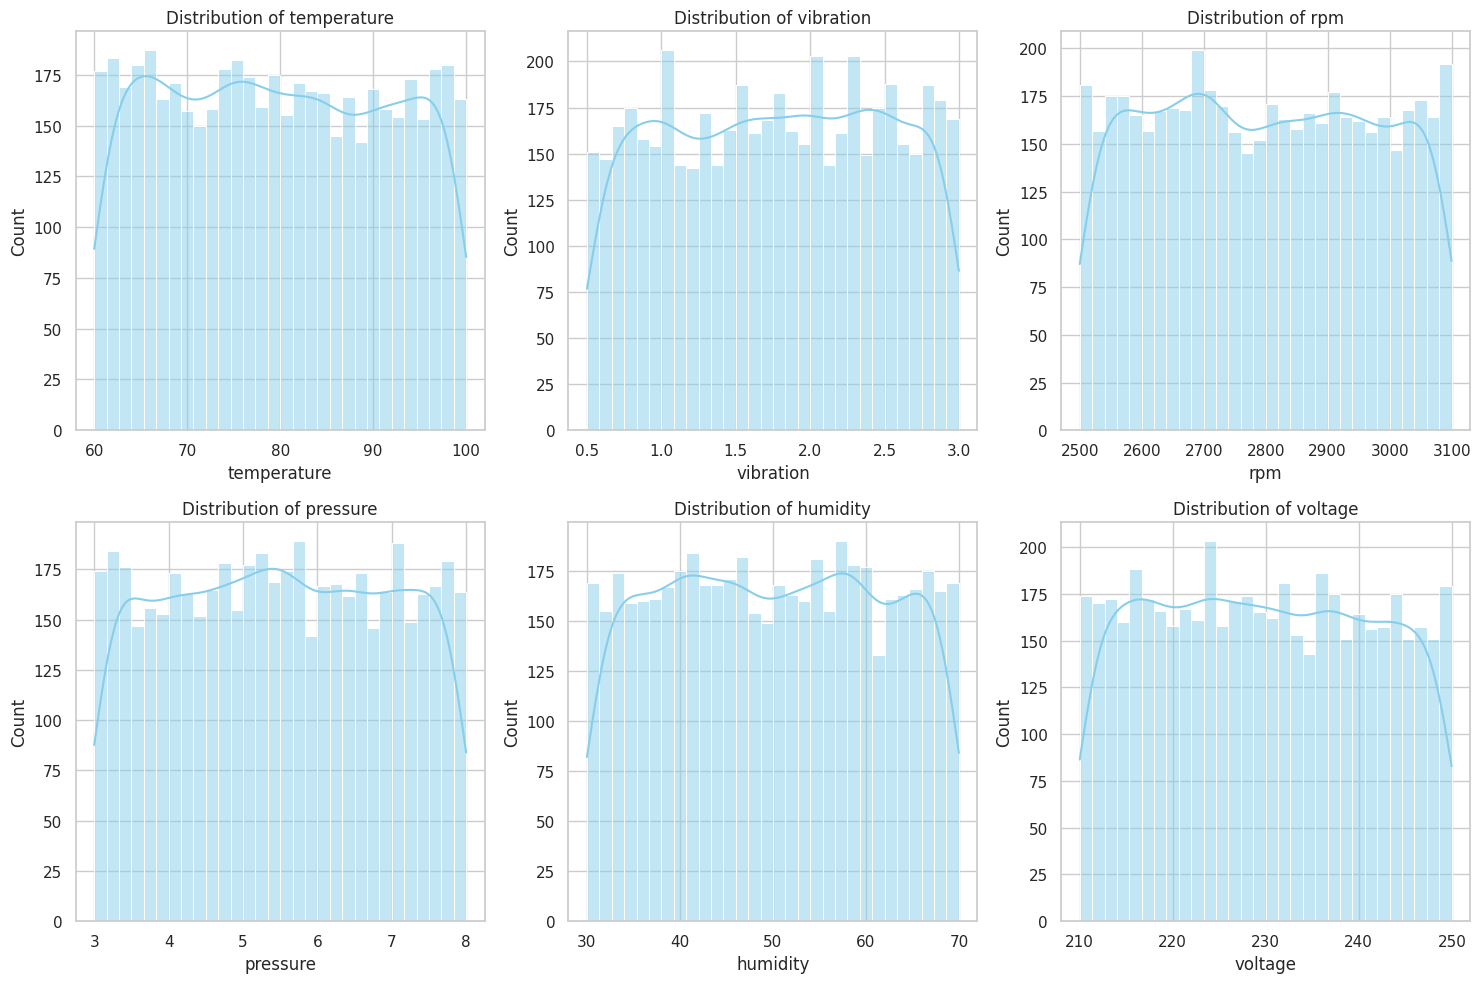

In [12]:
# Distribution plots for all sensor variables
features = ['temperature', 'vibration', 'rpm', 'pressure', 'humidity', 'voltage']
plt.figure(figsize=(15, 10))
for i, feat in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feat], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feat}')
plt.tight_layout()
plt.show()

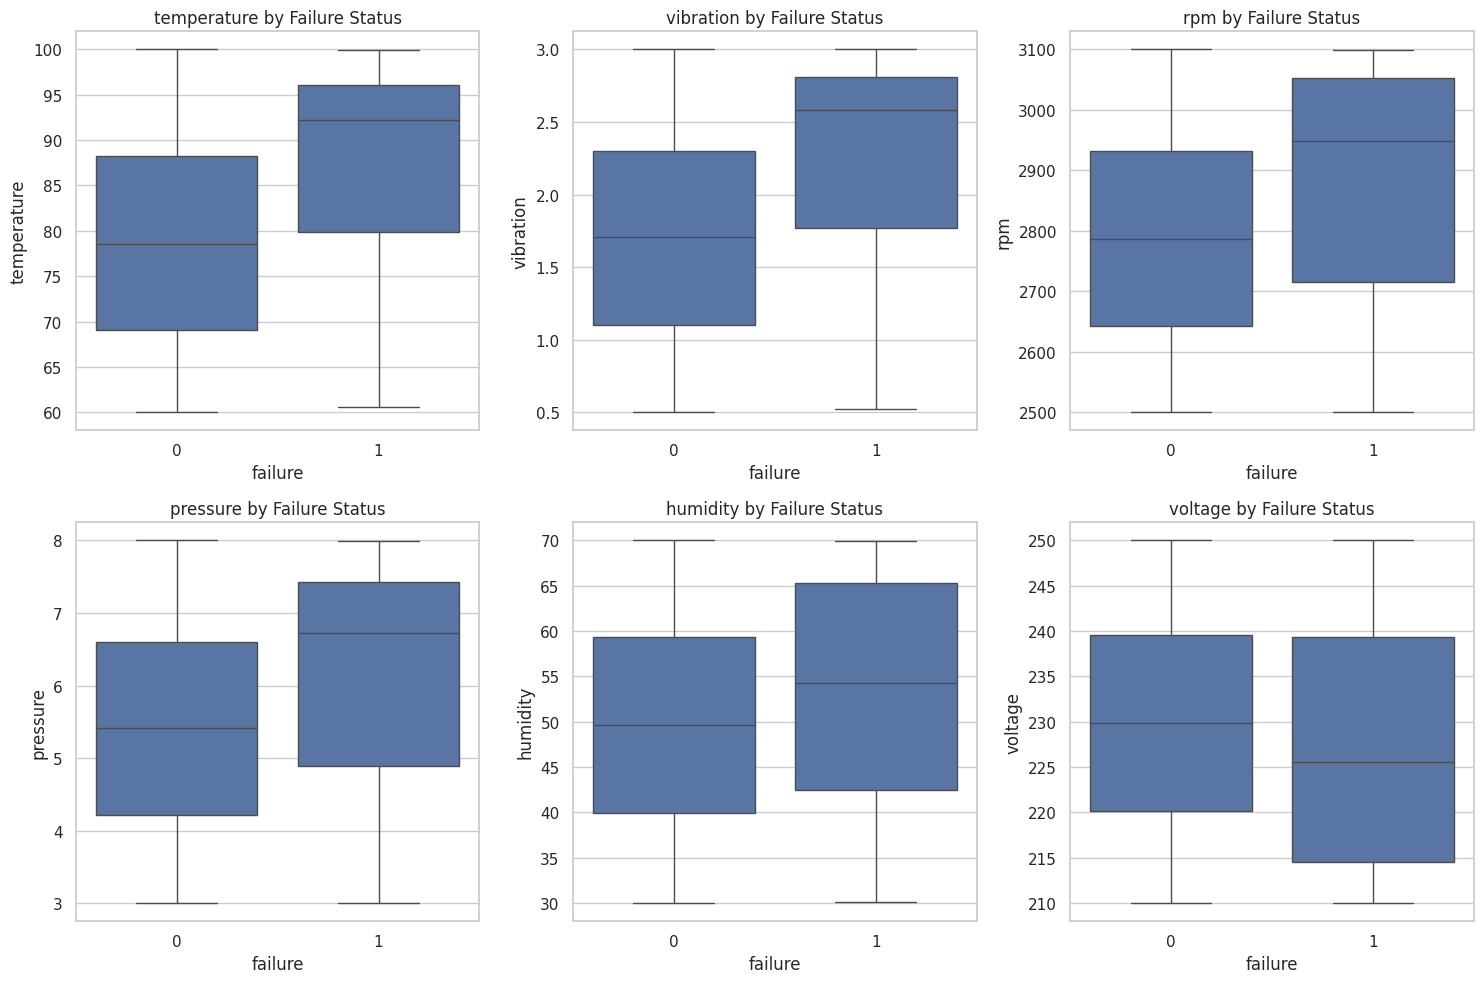

In [13]:
# Boxplots by failure class
plt.figure(figsize=(15, 10))
for i, feat in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='failure', y=feat, data=df)
    plt.title(f'{feat} by Failure Status')
plt.tight_layout()
plt.show()

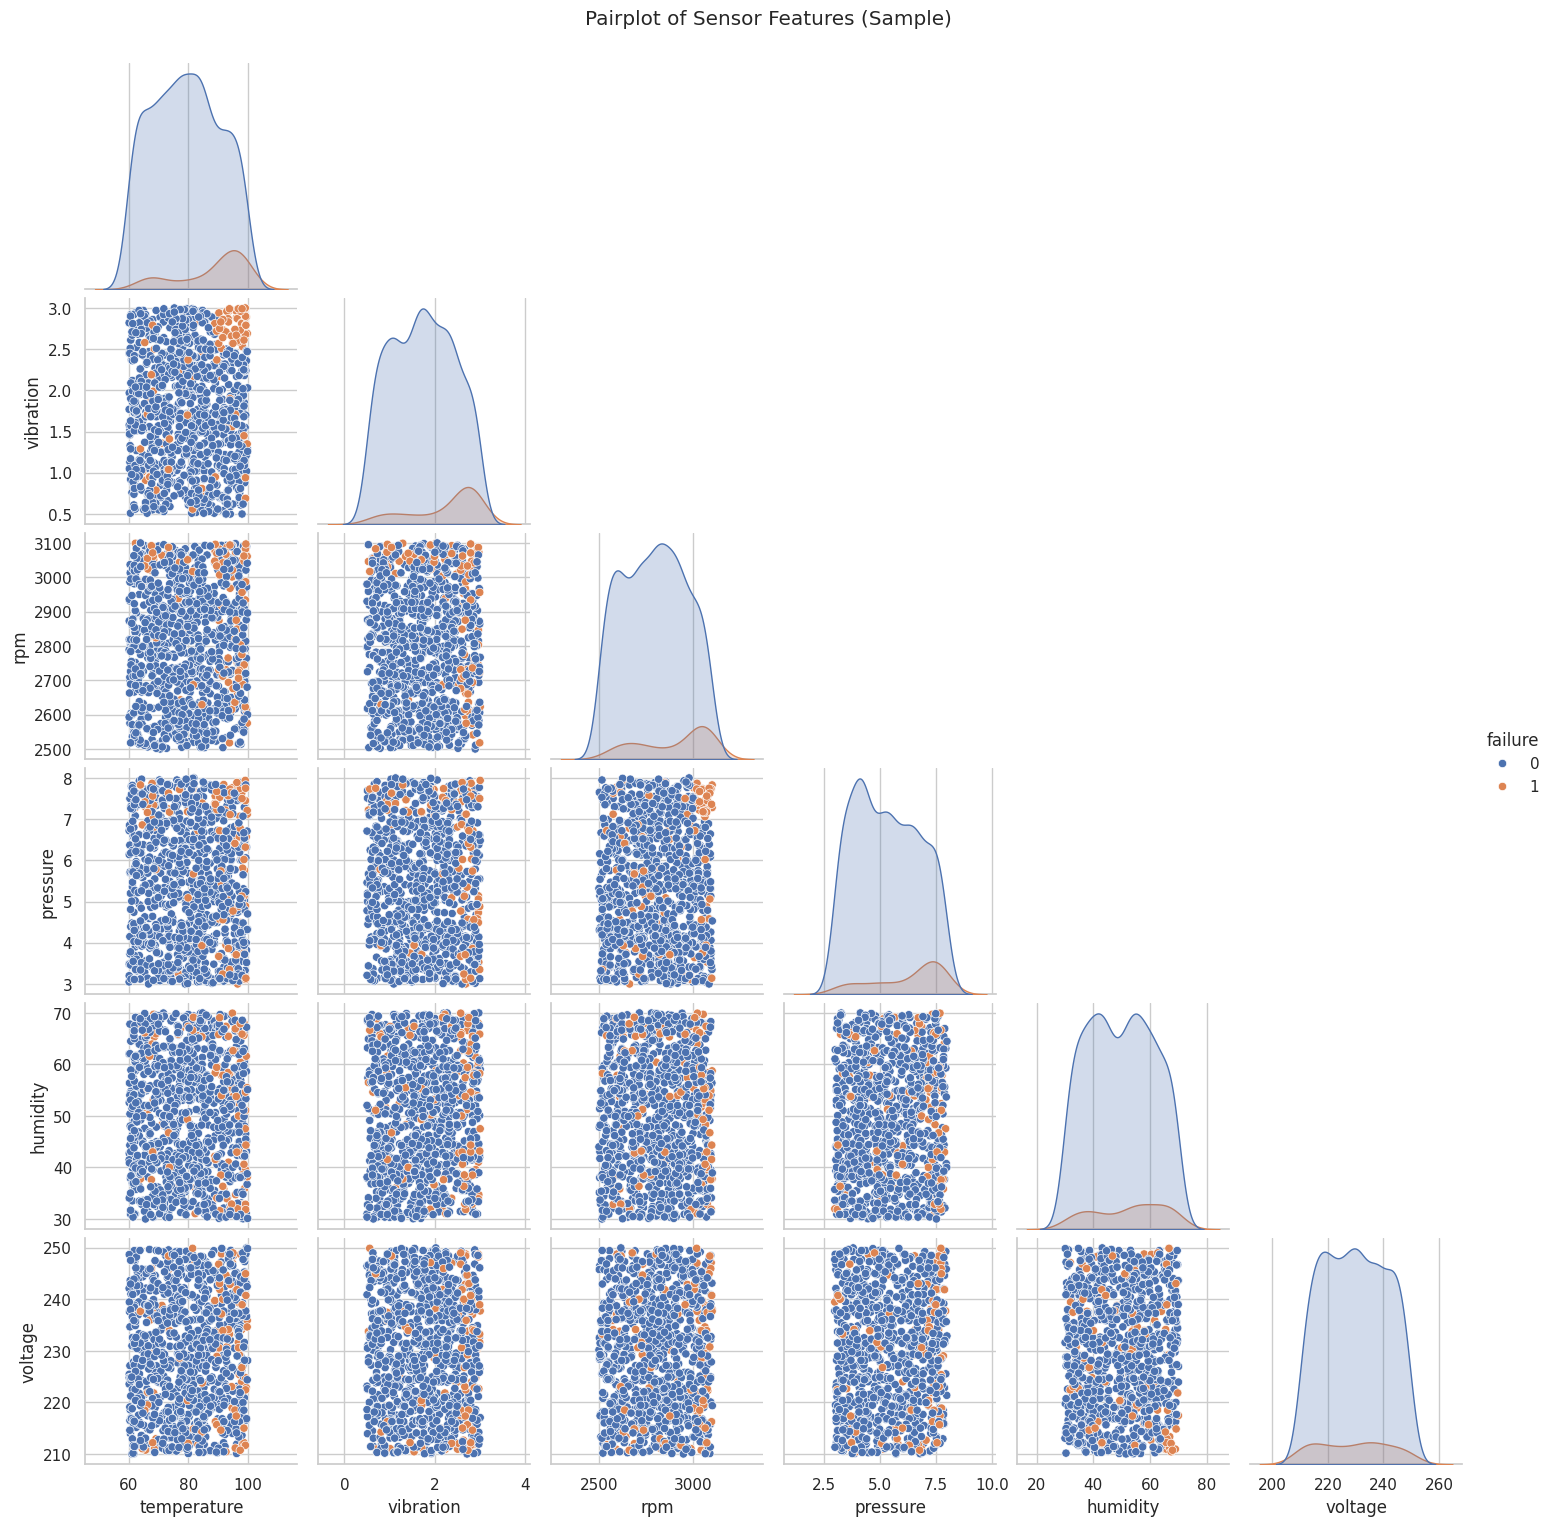

In [14]:
# Pairplot on a smaller sample
sample = df.sample(1000, random_state=42)
sns.pairplot(sample, hue='failure', diag_kind='kde', corner=True,
             vars=['temperature', 'vibration', 'rpm', 'pressure', 'humidity', 'voltage'])
plt.suptitle('Pairplot of Sensor Features (Sample)', y=1.02)
plt.show()

<ipython-input-15-cd19e69c8ff2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fail_counts.index, y=fail_counts.values, palette="Reds_d")


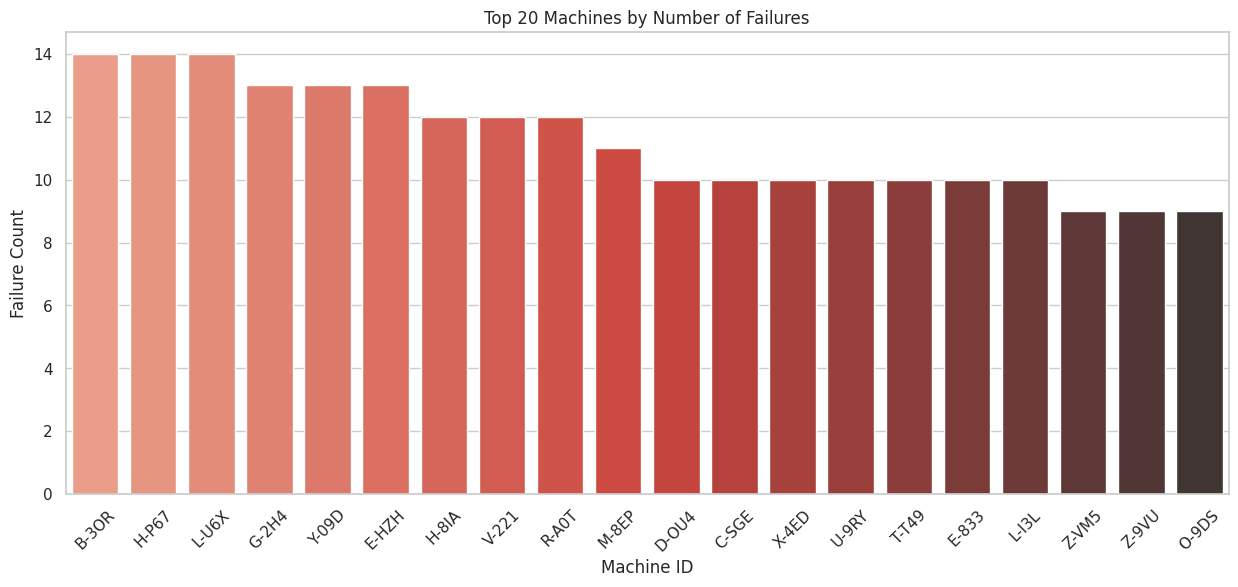

In [15]:
# Failure counts per machine
plt.figure(figsize=(15,6))
fail_counts = df.groupby('machine_id')['failure'].sum().sort_values(ascending=False).head(20)
sns.barplot(x=fail_counts.index, y=fail_counts.values, palette="Reds_d")
plt.title('Top 20 Machines by Number of Failures')
plt.xlabel('Machine ID')
plt.ylabel('Failure Count')
plt.xticks(rotation=45)
plt.show()

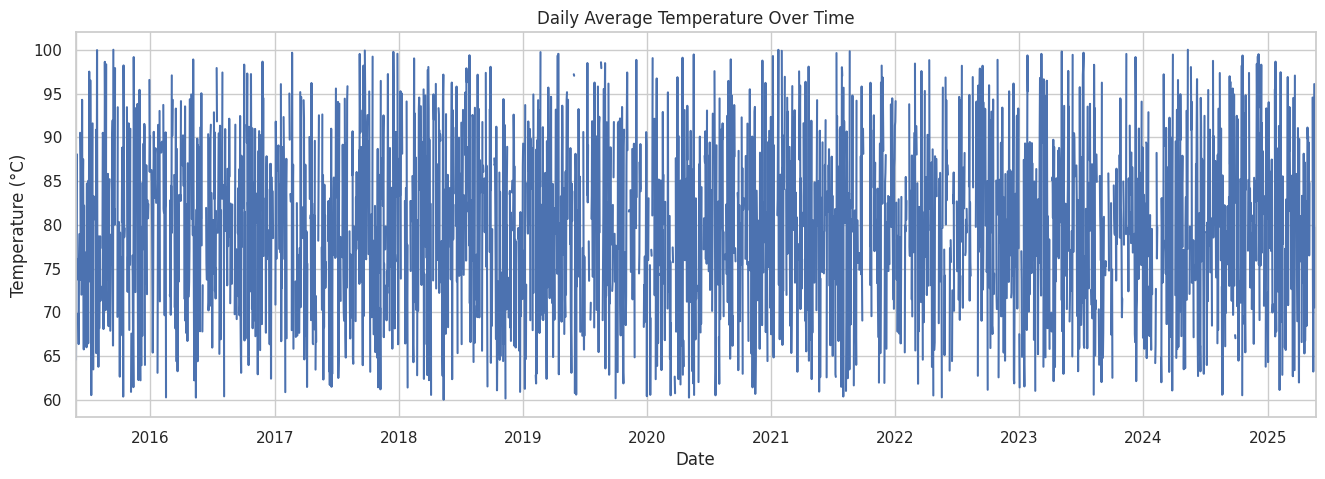

In [16]:
# Time series - average temperature over time (daily)
df.set_index('timestamp', inplace=True)
daily_temp = df['temperature'].resample('D').mean()

plt.figure(figsize=(16,5))
daily_temp.plot()
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

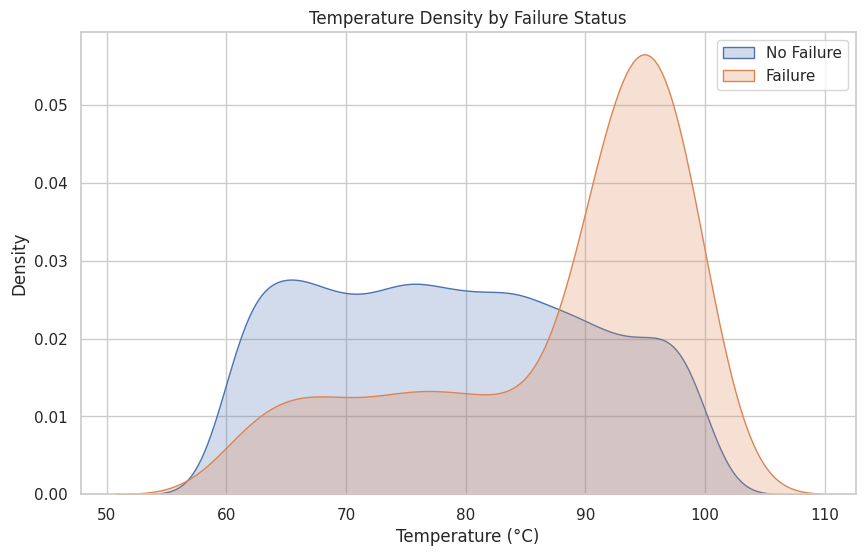

In [17]:
# Temperature distribution for failed vs non-failed data points
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['failure'] == 0]['temperature'], label='No Failure', fill=True)
sns.kdeplot(df[df['failure'] == 1]['temperature'], label='Failure', fill=True)
plt.title('Temperature Density by Failure Status')
plt.xlabel('Temperature (°C)')
plt.legend()
plt.show()

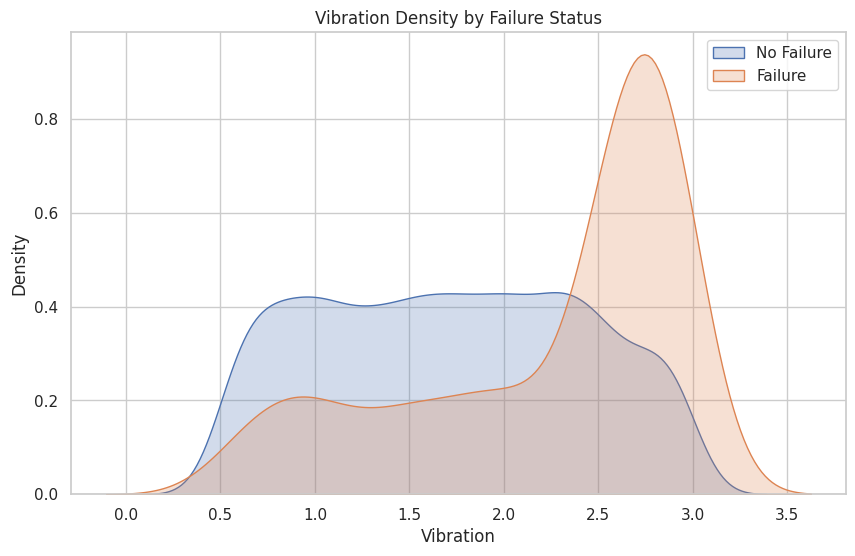

In [18]:
# Vibration distribution by failure status
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['failure'] == 0]['vibration'], label='No Failure', fill=True)
sns.kdeplot(df[df['failure'] == 1]['vibration'], label='Failure', fill=True)
plt.title('Vibration Density by Failure Status')
plt.xlabel('Vibration')
plt.legend()
plt.show()

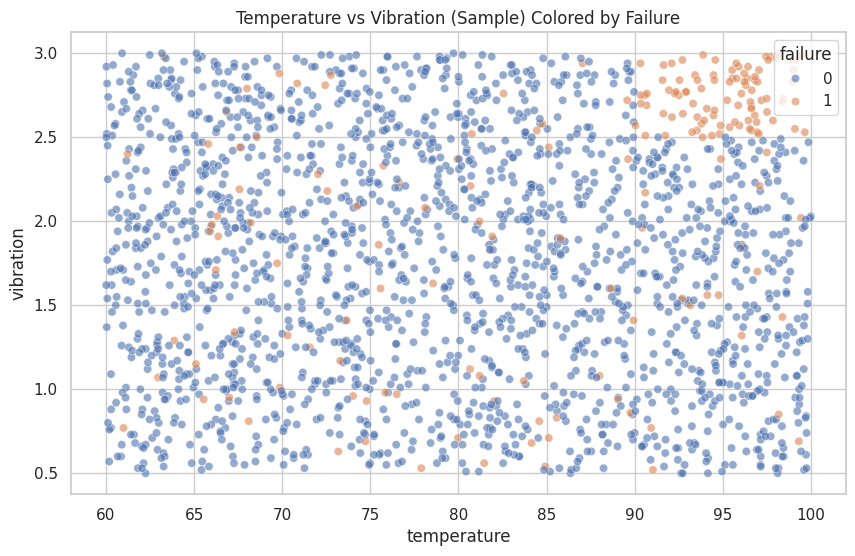

In [19]:
# Scatter plot temperature vs vibration colored by failure
plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(2000), x='temperature', y='vibration', hue='failure', alpha=0.6)
plt.title('Temperature vs Vibration (Sample) Colored by Failure')
plt.show()

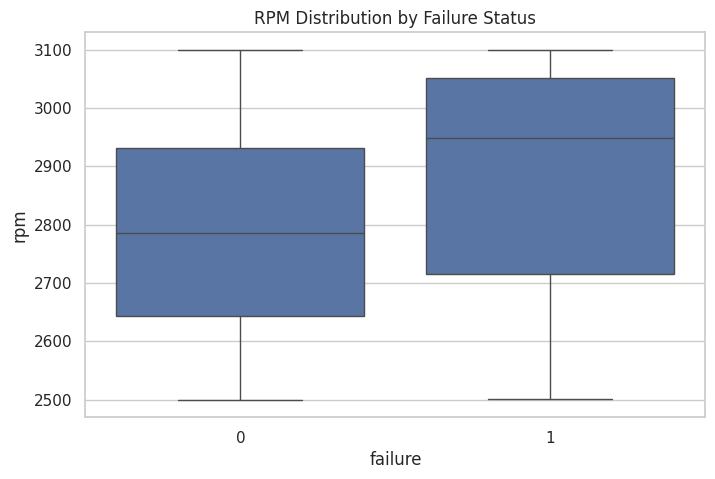

In [20]:
# RPM boxplot per failure class
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='failure', y='rpm')
plt.title('RPM Distribution by Failure Status')
plt.show()

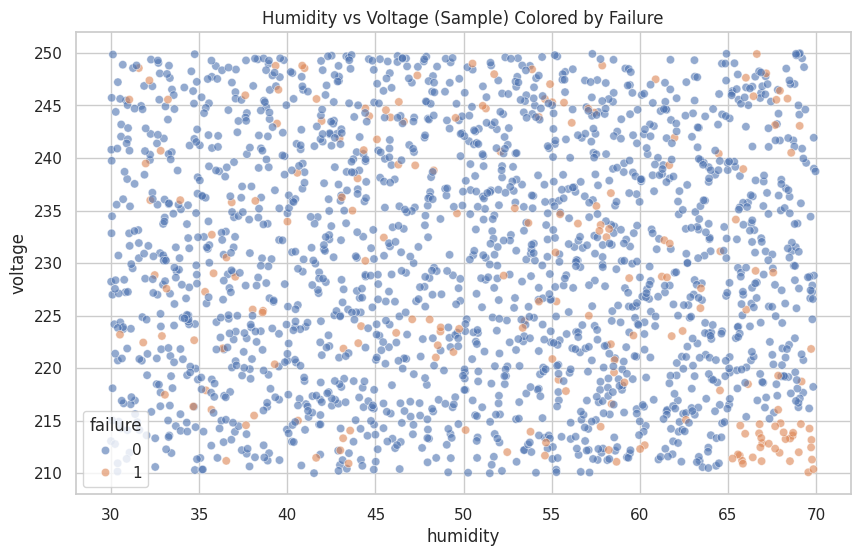

In [21]:
# Humidity vs Voltage scatter colored by failure
plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(2000), x='humidity', y='voltage', hue='failure', alpha=0.6)
plt.title('Humidity vs Voltage (Sample) Colored by Failure')
plt.show()

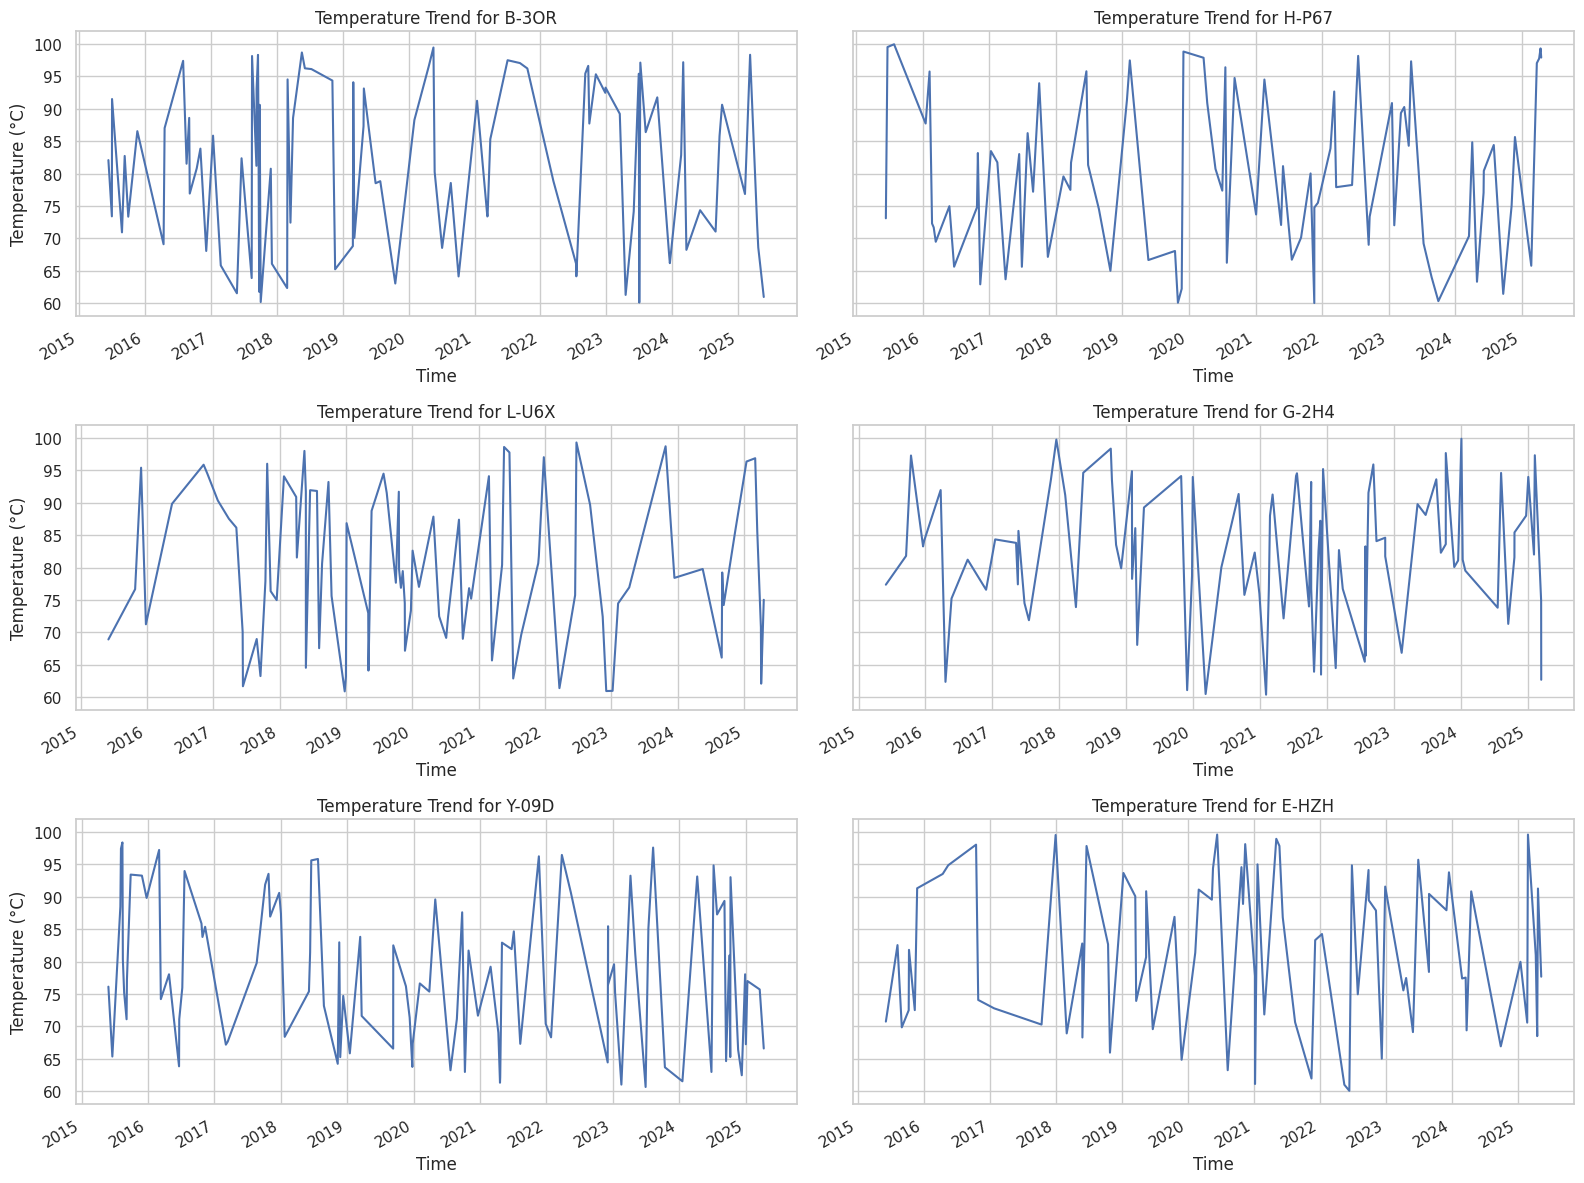

In [22]:
# Temperature time trend for top 6 machines with most failures
top_machines = fail_counts.index[:6]
fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharey=True)
for i, machine in enumerate(top_machines):
    ax = axes[i//2, i%2]
    subset = df[df['machine_id'] == machine]
    subset['temperature'].plot(ax=ax)
    ax.set_title(f'Temperature Trend for {machine}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

In [23]:
df.reset_index(inplace=True)
df.head()

,timestamp,index,machine_id,temperature,vibration,rpm,pressure,humidity,voltage,failure
0,2015-05-26 20:55:13.644050,3168,B-MY9,71.47,0.94,2694,7.50,65.72,215.55,0
1,2015-05-27 20:15:37.644050,2680,N-PR7,64.60,2.44,3054,6.96,44.25,226.71,0
2,2015-05-28 07:53:40.644050,3897,Y-09D,76.14,1.93,2952,6.41,51.60,243.14,0
3,2015-05-29 09:45:29.644050,824,X-PYA,73.72,1.87,2607,7.13,59.94,229.21,0
4,2015-05-30 06:22:48.644050,1952,G-2H4,77.37,0.57,3063,4.08,47.57,221.11,0
